In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yolo = cv2.dnn.readNet("./yolov3.weights", "./yolov3.cfg")

In [3]:
classes = []

with open("./coco.names", 'r') as f:
    classes = f.read().splitlines()

In [4]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
len(classes)

80

In [8]:
img = cv2.imread("./bus.jfif")

In [9]:
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)

In [10]:
blob.shape

(1, 3, 320, 320)

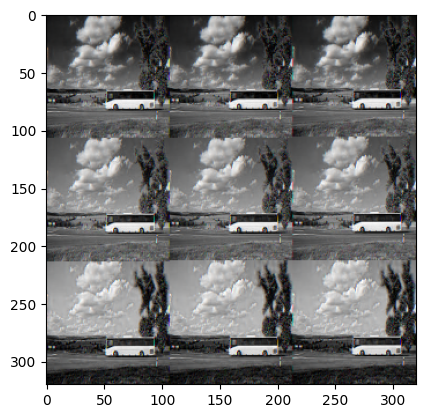

In [11]:
# to print img:

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [12]:
yolo.setInput(blob)

In [13]:
output_layers_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_names)

In [14]:
height, width, _ = img.shape

In [15]:
height

155

In [16]:
width

233

In [17]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        
        if confidence > 0.7 :
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [18]:
len(boxes)

4

In [19]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [20]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3) )

In [21]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color, 1)
    cv2.putText(img, label+" "+confi, (x,y+20), font, 2, (255,255,255), 1)

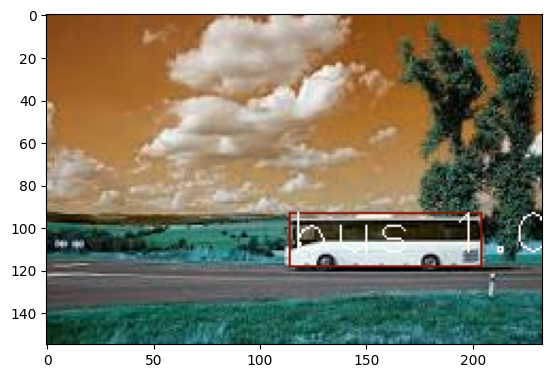

In [22]:
plt.imshow(img)